In [9]:
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')

client

Client Scheduler: inproc://10.150.76.31/6877/1 Dashboard: http://localhost:8787/status,Cluster Workers: 1 Cores: 4 Memory: 2.00 GB


In [1]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [3]:
%%timeit
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

3 s ± 173 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
from dask import delayed

In [10]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 959 µs, sys: 117 µs, total: 1.08 ms
Wall time: 1.15 ms


In [11]:
%%time
# This actually runs our computation using a local thread pool

z.compute()

CPU times: user 321 ms, sys: 33.3 ms, total: 354 ms
Wall time: 2.04 s


5

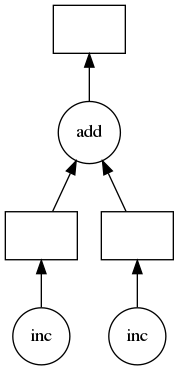

In [12]:
z.visualize()

In [13]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [14]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 737 ms, sys: 92.6 ms, total: 830 ms
Wall time: 8.01 s


In [15]:
total

44

In [20]:
%%time

results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)

CPU times: user 2.44 ms, sys: 0 ns, total: 2.44 ms
Wall time: 2.54 ms


In [22]:
%%time
total.compute()

CPU times: user 273 ms, sys: 27.7 ms, total: 301 ms
Wall time: 2.03 s


44

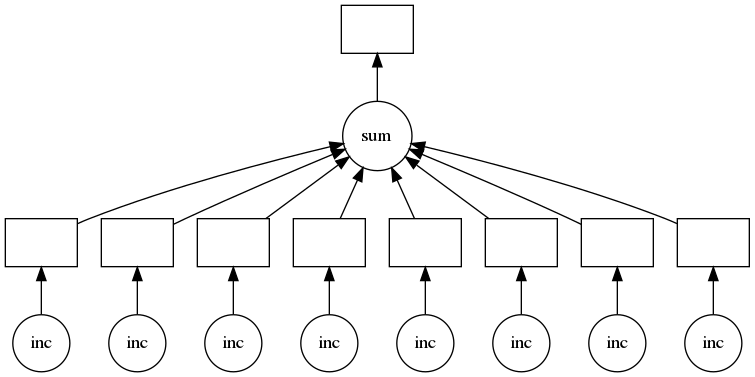

In [23]:
total.visualize()

In [24]:
delayed(inc)(1) + delayed(inc)(2)

Delayed('add-39001551feabfd412cc0e43b61b3d535')